In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from ta import add_all_ta_features

In [3]:
data = yf.download('BTC-USD', start='2024-04-01', end='2024-04-10', interval='15m')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Upper Bollinger,20 Mean,Lower Bollinger,Candle Colour,Bollinger Closness,Next day Candle Colour
Datetime,,,,,,,,,,,,
2024-04-01 05:00:00,70468.718750,70525.195312,70451.625000,70500.617188,70500.617188,32260096,71211.845437,70798.874219,70385.903000,1,0.001627,0
2024-04-01 05:15:00,70489.531250,70489.531250,70389.273438,70400.375000,70400.375000,7596032,71184.797513,70763.203516,70341.609519,0,0.000835,0
2024-04-01 05:30:00,70406.976562,70406.976562,70178.468750,70223.101562,70223.101562,92536832,71202.026169,70726.696094,70251.366018,0,-0.000402,0
2024-04-01 05:45:00,70198.757812,70198.757812,69157.265625,69357.367188,69357.367188,1069465600,71376.437035,70636.641797,69896.846558,0,-0.007778,1
2024-04-01 06:00:00,69220.796875,69385.648438,68986.945312,69277.492188,69277.492188,902715392,71474.770738,70546.680469,69618.590200,1,-0.004924,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 21:15:00,69005.757812,69097.156250,68944.851562,69002.406250,69002.406250,22740992,69252.977647,68878.630078,68504.282509,0,-0.003631,1
2024-04-09 21:30:00,69043.671875,69171.859375,69043.671875,69132.648438,69132.648438,85127168,69280.739499,68900.546094,68520.352689,1,-0.002142,1
2024-04-09 21:45:00,69123.195312,69224.398438,69102.015625,69212.617188,69212.617188,34979840,69310.871178,68930.098437,68549.325697,1,-0.001420,0


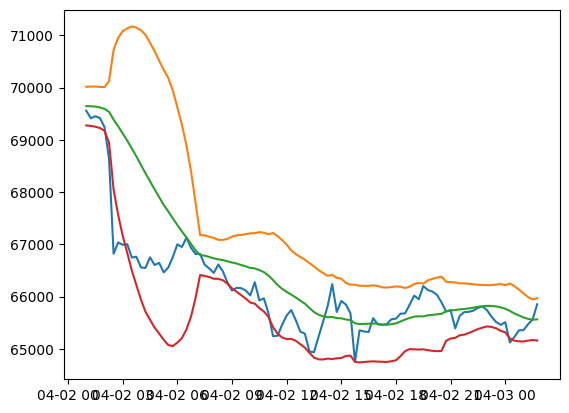

In [4]:
data['Upper Bollinger'] = data['Close'].rolling(window=20).mean() + 2 * data['Close'].rolling(window=20).std()
data['20 Mean'] = data['Close'].rolling(window=20).mean()
data['Lower Bollinger'] = data['Close'].rolling(window=20).mean() - 2 * data['Close'].rolling(window=20).std()
data['Candle Colour'] = np.where(data['Close'] > data['Open'], '1', '0')
data['Bollinger Closness'] = np.where(data['Close'] > data['20 Mean'], (data['Close'] - data['Upper Bollinger'])/ data['Close'], (data['Close'] - data['Lower Bollinger'])/ data['Close'])
data['Next day Candle Colour'] = data['Candle Colour'].shift(-1)

plt.plot(data['Close'][100:200])
plt.plot(data['Upper Bollinger'][100:200])
plt.plot(data['20 Mean'][100:200])
plt.plot(data['Lower Bollinger'][100:200])

data = data[20:]

data

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,Upper Bollinger,20 Mean,Lower Bollinger,Candle Colour,Bollinger Closness,Next day Candle Colour
Datetime,,,,,,,,,,,,
2024-04-01 05:00:00,70468.718750,70525.195312,70451.625000,70500.617188,70500.617188,32260096,71211.845437,70798.874219,70385.903000,1,0.001627,0
2024-04-01 05:15:00,70489.531250,70489.531250,70389.273438,70400.375000,70400.375000,7596032,71184.797513,70763.203516,70341.609519,0,0.000835,0
2024-04-01 05:30:00,70406.976562,70406.976562,70178.468750,70223.101562,70223.101562,92536832,71202.026169,70726.696094,70251.366018,0,-0.000402,0
2024-04-01 05:45:00,70198.757812,70198.757812,69157.265625,69357.367188,69357.367188,1069465600,71376.437035,70636.641797,69896.846558,0,-0.007778,1
2024-04-01 06:00:00,69220.796875,69385.648438,68986.945312,69277.492188,69277.492188,902715392,71474.770738,70546.680469,69618.590200,1,-0.004924,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-09 21:15:00,69005.757812,69097.156250,68944.851562,69002.406250,69002.406250,22740992,69252.977647,68878.630078,68504.282509,0,-0.003631,1
2024-04-09 21:30:00,69043.671875,69171.859375,69043.671875,69132.648438,69132.648438,85127168,69280.739499,68900.546094,68520.352689,1,-0.002142,1
2024-04-09 21:45:00,69123.195312,69224.398438,69102.015625,69212.617188,69212.617188,34979840,69310.871178,68930.098437,68549.325697,1,-0.001420,0


In [6]:
# Drop the last row
data = data[:-1]
data = np.array(data)
data.shape

(837, 12)

In [9]:
X = data[:, 0:11]
Y = data[:, 11]

X = X.astype('float32')
Y = Y.astype('float32')

In [11]:
Y.shape

Y = Y.reshape(1, -1)
X = X.reshape(11, data.shape[0])
X

array([[ 7.0468719e+04,  7.0525195e+04,  7.0451625e+04, ...,
         0.0000000e+00, -4.4651264e-03,  6.9694047e+04],
       [ 6.9699953e+04,  6.9511719e+04,  6.9593148e+04, ...,
        -5.1962808e-03,  6.5830617e+04,  6.6061484e+04],
       [ 6.5830617e+04,  6.6017617e+04,  6.6017617e+04, ...,
         6.5821875e+04,  6.6736055e+04,  6.5821875e+04],
       ...,
       [ 6.9215273e+04,  1.0000000e+00, -1.6354430e-03, ...,
         7.0818109e+04,  6.9780594e+04,  6.8743070e+04],
       [ 1.0000000e+00,  5.5823736e-03,  7.1326547e+04, ...,
         7.1529859e+04,  7.1065258e+04,  1.0000000e+00],
       [-5.8100969e-03,  7.1585820e+04,  7.1631469e+04, ...,
         6.8683672e+04,  0.0000000e+00, -1.2590730e-03]], dtype=float32)

In [22]:
def init_params():
    W1 = np.random.rand(32, data.shape[1] -1) - 0.5
    b1 = np.random.rand(32, 1) - 0.5
    W2 = np.random.rand(32, 32) - 0.5
    b2 = np.random.rand(32, 1) - 0.5
    W3 = np.random.rand(32, 32) - 0.5
    b3 = np.random.rand(32, 1) - 0.5
    W4 = np.random.rand(32, 32) - 0.5
    b4 = np.random.rand(32, 1) - 0.5
    W5 = np.random.rand(1, 32) - 0.5
    b5 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [23]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

In [24]:
def forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5):
    Z1 = np.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = ReLU(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = ReLU(Z3)
    Z4 = np.dot(W4, A3) + b4
    A4 = ReLU(Z4)
    Z5 = np.dot(W5, A4) + b5
    A5 = Z5
    return Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5

In [25]:
def backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y):
    m = X.shape[1]
    dZ5 = A5 - Y
    dW5 = np.dot(dZ5, A4.T) / m
    db5 = np.sum(dZ5, axis=1, keepdims=True) / m
    dA4 = np.dot(W5.T, dZ5)
    dZ4 = dA4 * ReLU_deriv(Z4)
    dW4 = np.dot(dZ4, A3.T) / m
    db4 = np.sum(dZ4, axis=1, keepdims=True) / m
    dA3 = np.dot(W4.T, dZ4)
    dZ3 = dA3 * ReLU_deriv(Z3)
    dW3 = np.dot(dZ3, A2.T) / m
    db3 = np.sum(dZ3, axis=1, keepdims=True) / m
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = dA2 * ReLU_deriv(Z2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * ReLU_deriv(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5

In [26]:
def update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    W4 -= alpha * dW4
    b4 -= alpha * db4
    W5 -= alpha * dW5
    b5 -= alpha * db5
    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5

In [27]:
def mse(A5, Y):
    m = Y.shape[1]
    return np.sum((A5 - Y) ** 2) / m

In [28]:
X = X / np.max(X)
Y = Y / np.max(Y)

In [33]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = init_params()
    losses = []  # Initialize list to store loss values
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5 = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
        loss = mse(A5, Y)
        if i % 100 == 0:
            print("loss: ", loss, "iteration: ", i)
        dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = backward_prop(Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, A5, W1, W2, W3, W4, W5, X, Y)
        W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = update_parameters(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5, alpha)
        losses.append(loss)  # Append loss value to list
    # Plot the loss values
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(losses) - 100), losses[100:])
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

    return W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5

loss:  1.1886958952629356 iteration:  0
loss:  0.24824489230938943 iteration:  100
loss:  0.24770895543159482 iteration:  200
loss:  0.2473565777439472 iteration:  300
loss:  0.24715713810821613 iteration:  400
loss:  0.24702215569380873 iteration:  500
loss:  0.24690303405685005 iteration:  600
loss:  0.24679591316474375 iteration:  700
loss:  0.2467029094269311 iteration:  800
loss:  0.24661250471843535 iteration:  900
loss:  0.24650513329436755 iteration:  1000
loss:  0.2463980689781375 iteration:  1100
loss:  0.2463132190420016 iteration:  1200
loss:  0.24624498650084012 iteration:  1300
loss:  0.2461891113084171 iteration:  1400
loss:  0.24610594800783386 iteration:  1500
loss:  0.24601638030267906 iteration:  1600
loss:  0.24596987375279888 iteration:  1700
loss:  0.24592755234789018 iteration:  1800
loss:  0.24588825333114656 iteration:  1900
loss:  0.24585392254538474 iteration:  2000
loss:  0.24582232787674743 iteration:  2100
loss:  0.24579152050276443 iteration:  2200
loss: 

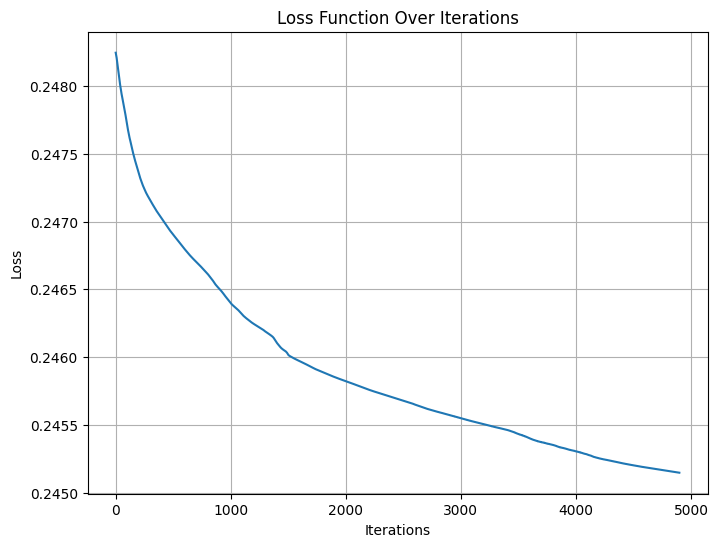

In [34]:
W1, b1, W2, b2, W3, b3, W4, b4, W5, b5, A5 = gradient_descent(X, Y, 0.01, 5000)


In [35]:
Z1, A1, Z2, A2, Z3, A3, Z4, A4, Z5, y_pred = forward_prop(X, W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)

y_pred = y_pred * np.max(Y)
for i in range(y_pred.shape[1]):
    if y_pred.T[i] > 0.5:
        y_pred.T[i] = 1
    else:
        y_pred.T[i] = 0
t = 0
for i in range(y_pred.shape[1]):
    if y_pred.T[i] == Y.T[i]:
        print("Correct")
        t = t + 1
    else:
        print("Incorrect")
t / y_pred.shape[1]


Incorrect
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Incorrect
Correct
Incorrect
Incorrect
Incorrect
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Incorrect
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Incorrect
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Correct
Incorrect
Correct
Incorrect
Incorrect
Correct
Incorrect
Correct
Incorrect
Correct
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Incorrect
Incorrect
Correct
Correct
Correct
Correct
Correct
Incorrect
Incorrect
Correct
Incorrect
Correct
Incorrect
Correc

0.5364396654719236

In [34]:
Y

array([[0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
        0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 